Name: Tian Liu  
UIN: 525004380

##### (1) Check out the Jupyter notebook for Chapter 5 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb . Answer the question: what regularization techniques were mentioned in that Jupyter notebook? (5 points)


Answer:  
The notebook described the L1, L2 regularization as well as the drop out.

##### (2) The MNIST dataset has 60,000 training images and 10,000 test images. Each image is a 28x28 array, where each array element is between 0 and 255. The images have 10 labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

We now create a new dataset of 30,000 training images, 5,000 test images and 5 labels (which are 0, 1, 2, 3, 4) as follows. First, randomly pair up the training images of label 0 with the training images of label 1, to get 6,000 such pairs. Then, for each pair (A,B) where A is an image of label 0 and B is an image of label 1, we create a new image of size 28x28, where each element's value is the "average" of the two corresponding pixel values in A and B. (So the new image is a "mixture" of the two original images.) This way we create 6,000 new "mixture" images for training. In a similar way, we create 1,000 new "mixture" images for testing. We give all these 6,000+1,000=7,000 new "mixture" images the new label 0. Then, in the same way, we create 6,000 new training images and 1,000 new test images by mixing the original images of label "2" and "3", and give them the new label 1; create 6,000 new training images and 1,000 new test images by mixing the original images of label "4" and "5", and give them the new label 2; create 6,000 new training images and 1,000 new test images by mixing the original images of label "6" and "7", and give them the new label 3; create 6,000 new training images and 1,000 new test images by mixing the original images of label "8" and "9", and give them the new label 4.    

Your task: submit your code that creates the above new dataset; then for each of the 5 new labels, randomly select 2 images of that label from your new dataset, and display them in your submitted Jupyter notebook. (5 points)


Answer:  

See the code below for details.

In [7]:
# code to create the dataset

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from numpy import random

def random_pair(class1, class2, count, label):

  img_list = []
  for i in range(count):
    id1 = random.randint(len(class1))
    id2 = random.randint(len(class2))
    img_1 = class1[id1]
    img_2 = class2[id2]

    mix_img = (img_1 + img_2) / 2
    img_list.append(mix_img)

  img_labels = np.full((count,1), label)

  return img_list, img_labels


def collect_by_label(image, labels):

  result = dict()
  for idx, label in enumerate(labels):
    if label not in result:
      result[label] =[image[idx]]
    else:
      result[label].append(image[idx])
  
  for k, v in sorted(result.items()):
    print("class {} has {} images".format(k,len(v)))
  print()

  return result
  

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# collect images by its labels
train_images_dict = collect_by_label(train_images, train_labels)
test_images_dict = collect_by_label(test_images, test_labels)

mix_train_images_list = []
mix_test_images_list = []
mix_train_labels_list = []
mix_test_labels_list = []
for i in range(0,5):
  mix_train_images, mix_train_labels = random_pair(train_images_dict[2*i], train_images_dict[2*i+1], 6000, i)
  mix_test_images, mix_test_labels = random_pair(test_images_dict[2*i], test_images_dict[2*i+1], 1000, i)

  mix_train_images_list.append(mix_train_images)
  mix_test_images_list.append(mix_test_images)
  mix_train_labels_list.append(mix_train_labels)
  mix_test_labels_list.append(mix_test_labels)

# convert to numpy arrays
mix_train_img = np.concatenate(mix_train_images_list, axis=0)
mix_test_img = np.concatenate(mix_test_images_list, axis=0)
mix_train_lbl = np.concatenate(mix_train_labels_list, axis=0)
mix_test_lbl = np.concatenate(mix_test_labels_list, axis=0)

print(mix_train_img.shape)
print(mix_test_img.shape)
print(mix_train_lbl.shape)
print(mix_test_lbl.shape)

class 0 has 5923 images
class 1 has 6742 images
class 2 has 5958 images
class 3 has 6131 images
class 4 has 5842 images
class 5 has 5421 images
class 6 has 5918 images
class 7 has 6265 images
class 8 has 5851 images
class 9 has 5949 images

class 0 has 980 images
class 1 has 1135 images
class 2 has 1032 images
class 3 has 1010 images
class 4 has 982 images
class 5 has 892 images
class 6 has 958 images
class 7 has 1028 images
class 8 has 974 images
class 9 has 1009 images

(30000, 784)
(5000, 784)
(30000, 1)
(5000, 1)


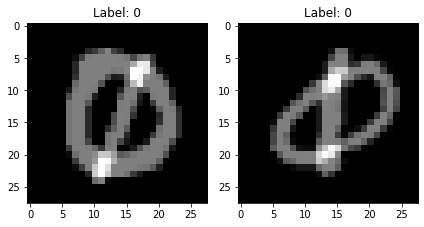

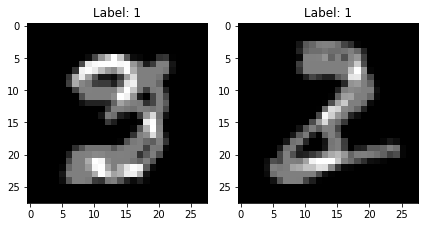

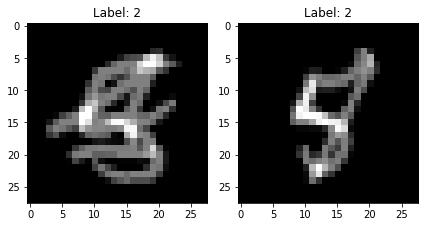

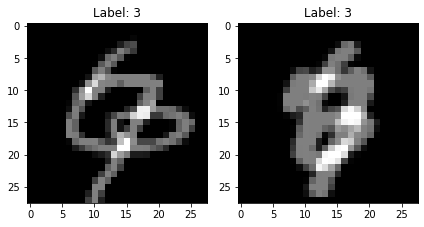

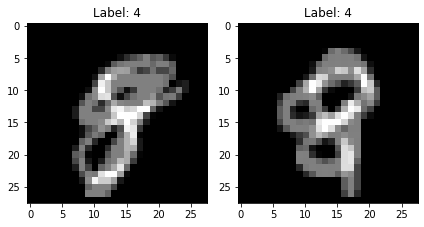

In [14]:
# display samples of the new dataset, randomly sample 1 from training dataset, 1 from test dataset

import matplotlib.pyplot as plt

def plot_sample(train_img, test_img, label, count):

  for i in range(count):
    idx_1 = random.randint(6000*label,6000*(label+1))
    train_image_1 = train_img[idx_1].reshape(28,28)

    idx_3 = random.randint(1000*label,1000*(label+1))
    test_image_1 = test_img[idx_3].reshape(28,28)

    fig, axes = plt.subplots(1, 2)
    ax = axes[0]
    ax.imshow(train_image_1, cmap='gray')
    ax.set_title('Label: {}'.format(label))

    ax = axes[1]
    ax.imshow(test_image_1, cmap='gray')
    ax.set_title('Label: {}'.format(label))

    plt.tight_layout()
    plt.show()

for i in range(5):
  plot_sample(mix_train_img, mix_test_img, i, 1)

##### (3) Design a neural network model to classify the 5 classes in the new dataset, and optimize it by tuning its hyper-parameters and trying our learned regualization techniques (such as L1 regularization, L2 regularization, dropout). 

Your task: For your final (namely, optimized) neural network model, submit its code, and show the model's performance (including loss value and accuracy) for training, validation and testing. (For training performance and validation performance, illustrate them using figures, where the x-axis is the number of training epochs, and the y-axis is the loss or accuracy. For testing performance, just show the values of loss and accuracy.) Also, answer the questions: in this process of optimizing your model, did you observe underfitting? Did you observe overfitting? Did you try the reguliazation techniques? Did they help? (10 points)

Answer:  

Using the two-layer structure model (hidden layer of 256 neurons and relu activation), the model achieves good train and validation performance. No under-fitting is observed. However, overfitting is observed after 9th epoch with increasing validation loss and decreasing validation accuracy, while the training loss keeps decreasing and training accuracy keeps increasing.

Because the overfitting here in this problem is not extreme, simply adding a dropout layer resolves the overfitting. Using a L2 regularization made the performance worse. The final model and its performance is shown in the code below.

In [48]:
# model to classify the 5-class dataset
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

model = keras.Sequential([
    layers.Dense(256, activation="relu"), #kernel_regularizer=regularizers.l2(0.001)), # use L2 regularization
    #layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), # add dropout layer
    layers.Dense(5, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# split train and val data
X_train, X_val, y_train, y_val = train_test_split(mix_train_img, mix_train_lbl, test_size=0.2, shuffle=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/10
188/188 [==============================] - 3s 11ms/step - loss: 0.2813 - accuracy: 0.9146 - val_loss: 0.1299 - val_accuracy: 0.9593
Epoch 2/10
188/188 [==============================] - 2s 10ms/step - loss: 0.1324 - accuracy: 0.9561 - val_loss: 0.1078 - val_accuracy: 0.9670
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.1059 - accuracy: 0.9649 - val_loss: 0.0962 - val_accuracy: 0.9692
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0899 - accuracy: 0.9699 - val_loss: 0.0905 - val_accuracy: 0.9722
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0767 - accuracy: 0.9747 - val_loss: 0.0860 - val_accuracy: 0.9722
Epoch 6/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0688 - accuracy: 0.9782 - val_loss: 0.0733 - val_accuracy: 0.9773
Epoch 7/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.0675 - val_accuracy: 0.9785
E

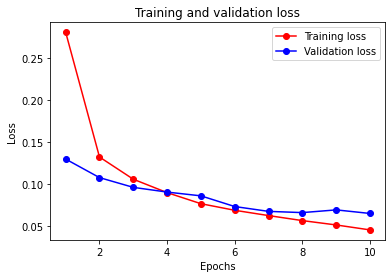

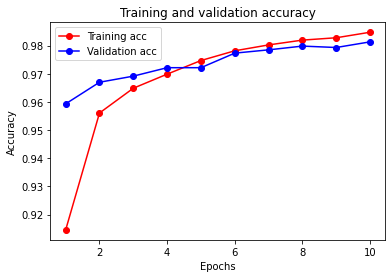

In [50]:
# plot training and validation loss and acc
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", marker="o", label="Training loss")
plt.plot(epochs, val_loss_values, "b", marker="o",label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r", marker="o", label="Training acc")
plt.plot(epochs, val_acc, "b", marker="o", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
# test performance
test_loss, test_acc = model.evaluate(mix_test_img, mix_test_lbl)
print(f"test_loss: {test_loss}")
print(f"test_acc: {test_acc}")

157/157 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9736
test_loss: 0.08067262172698975
test_acc: 0.9735999703407288
